In [1]:
import pandas as pd

In [2]:
#数据加载
filename='tianchi_fresh_comp_train_user.csv'
df=pd.read_csv(filename)
print(df.head())
print(df.columns)
print(df.info())
print(df.isnull().sum())

    user_id    item_id  behavior_type user_geohash  item_category  \
0  10001082  285259775              1      97lk14c           4076   
1  10001082    4368907              1          NaN           5503   
2  10001082    4368907              1          NaN           5503   
3  10001082   53616768              1          NaN           9762   
4  10001082  151466952              1          NaN           5232   

            time  
0  2014-12-08 18  
1  2014-12-12 12  
2  2014-12-12 12  
3  2014-12-02 15  
4  2014-12-12 11  
Index(['user_id', 'item_id', 'behavior_type', 'user_geohash', 'item_category',
       'time'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23291027 entries, 0 to 23291026
Data columns (total 6 columns):
user_id          int64
item_id          int64
behavior_type    int64
user_geohash     object
item_category    int64
time             object
dtypes: int64(4), object(2)
memory usage: 1.0+ GB
None
user_id                 0
item_id            

In [3]:
#计算CVR
count_all=0
count_4=0 #统计behavior_type=4
count_user=df['behavior_type'].value_counts()
print(count_user)
count_all=count_user[1]+count_user[2]+count_user[3]+count_user[4]
count_4=count_user[4]
cvr=count_4/count_all
print('CVR={}%'.format(cvr*100))

1    21940520
3      659437
2      458491
4      232579
Name: behavior_type, dtype: int64
CVR=0.9985776926023916%


In [4]:
#将time字段设置为pandas中的datetime类型
df['time']=pd.to_datetime(df['time'])
df.index=df['time']
print(df.head())
df.drop(['time'],axis=1,inplace=True)
print(df.head())

                      user_id    item_id  behavior_type user_geohash  \
time                                                                   
2014-12-08 18:00:00  10001082  285259775              1      97lk14c   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-12 12:00:00  10001082    4368907              1          NaN   
2014-12-02 15:00:00  10001082   53616768              1          NaN   
2014-12-12 11:00:00  10001082  151466952              1          NaN   

                     item_category                time  
time                                                    
2014-12-08 18:00:00           4076 2014-12-08 18:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-12 12:00:00           5503 2014-12-12 12:00:00  
2014-12-02 15:00:00           9762 2014-12-02 15:00:00  
2014-12-12 11:00:00           5232 2014-12-12 11:00:00  
                      user_id    item_id  behavior_type user_geohash  \
time                    

In [5]:
#时间规律统计
from collections import defaultdict
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
def show_count_day(df):
    count_day=defaultdict(int)
    #时间是从2014-11-18到2014-12-18
    str1='2014-11-18'
    #strptime将字符串转化为时间类型
    temp_date = datetime.strptime(str1, '%Y-%m-%d')
    delta=timedelta(days=1)
    for i in range(30):
        temp_date = temp_date+delta
        # strftime时间类型转换为字符串
        temp_str=temp_date.strftime('%Y-%m-%d')
        count_day[temp_str]+=df[temp_str].shape[0]
    print(count_day)
    df_count_day=pd.DataFrame.from_dict(count_day,orient='index', columns=['count'])
    df_count_day['count'].plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)

defaultdict(<class 'int'>, {'2014-11-19': 687528, '2014-11-20': 672189, '2014-11-21': 634122, '2014-11-22': 668509, '2014-11-23': 722978, '2014-11-24': 718217, '2014-11-25': 699413, '2014-11-26': 679323, '2014-11-27': 689855, '2014-11-28': 658806, '2014-11-29': 684442, '2014-11-30': 751093, '2014-12-01': 744363, '2014-12-02': 753810, '2014-12-03': 788689, '2014-12-04': 745391, '2014-12-05': 693593, '2014-12-06': 732821, '2014-12-07': 763498, '2014-12-08': 753138, '2014-12-09': 767838, '2014-12-10': 788712, '2014-12-11': 944979, '2014-12-12': 1344980, '2014-12-13': 777013, '2014-12-14': 779285, '2014-12-15': 764085, '2014-12-16': 751370, '2014-12-17': 734520, '2014-12-18': 711839})


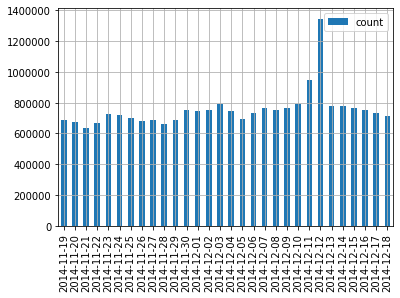

In [6]:
#时间规律统计    
show_count_day(df)

     item_id item_geohash  item_category
0  100002303          NaN           3368
1  100003592          NaN           7995
2  100006838          NaN          12630
3  100008089          NaN           7791
4  100012750          NaN           9614
(23291027, 5)
(4279962, 7)
                      user_id    item_id  behavior_type user_geohash  \
time                                                                   
2014-12-03 01:00:00  10001082  275221686              1          NaN   
2014-12-13 14:00:00  10001082  275221686              1          NaN   
2014-12-08 07:00:00  10001082  275221686              1          NaN   
2014-12-08 07:00:00  10001082  275221686              1          NaN   
2014-12-08 00:00:00  10001082  275221686              1          NaN   

                     item_category_x item_geohash  item_category_y  
time                                                                
2014-12-03 01:00:00            10576          NaN            10576  
2014-12-13 14:0

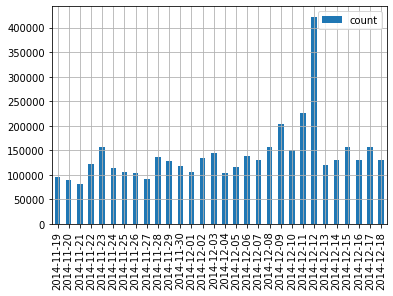

In [7]:
#属于商品子集P的操作次数
df_p=pd.read_csv('tianchi_fresh_comp_train_item.csv')
print(df_p.head())
print(df.shape)
df=pd.merge(df.reset_index(),df_p,on=['item_id']).set_index('time')
print(df.shape)
print(df.head())
show_count_day(df)

In [8]:
#基于小时的统计分布式
import matplotlib.pyplot as plt
def show_count_hour(date1):
    count_hour={}
    #设置初始值
    for i in range(24):
        time_str=date1+' %02.d' % i
        count_hour[time_str]=[0,0,0,0]
        
    for i in range(24):
        time_str=date1+' %02.d' % i
        temp=df[time_str]['behavior_type'].value_counts()
        for j in range(len(temp)):
            count_hour[time_str][temp.index[j]-1]+=temp[temp.index[j]]
    print(count_hour)
    # 从字典类型生成DataFrame
    df_count_hour=pd.DataFrame.from_dict(count_hour, orient='index')
    df_count_hour.plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)

{'2014-12-12 00': [29817, 336, 285, 758], '2014-12-12 01': [8736, 101, 288, 75], '2014-12-12 02': [13356, 24, 196, 22], '2014-12-12 03': [4530, 14, 42, 27], '2014-12-12 04': [4280, 11, 42, 10], '2014-12-12 05': [1243, 4, 46, 27], '2014-12-12 06': [6992, 20, 388, 60], '2014-12-12 07': [12673, 24, 102, 80], '2014-12-12 08': [19034, 40, 462, 558], '2014-12-12 09': [13913, 39, 176, 130], '2014-12-12 10': [43971, 55, 522, 210], '2014-12-12 11': [29353, 1662, 468, 140], '2014-12-12 12': [32532, 60, 211, 144], '2014-12-12 13': [9523, 65, 1811, 1745], '2014-12-12 14': [23214, 74, 182, 134], '2014-12-12 15': [9205, 51, 204, 122], '2014-12-12 16': [8948, 50, 145, 83], '2014-12-12 17': [20686, 225, 274, 165], '2014-12-12 18': [8288, 75, 109, 79], '2014-12-12 19': [19089, 48, 171, 118], '2014-12-12 20': [16837, 93, 198, 119], '2014-12-12 21': [20207, 85, 325, 176], '2014-12-12 22': [22404, 109, 373, 189], '2014-12-12 23': [25051, 1745, 1028, 197]}


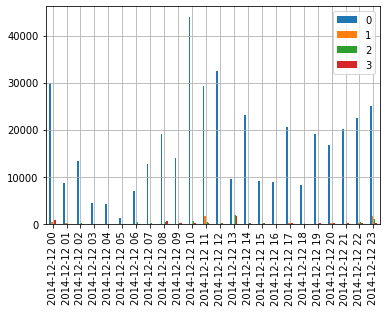

In [9]:
show_count_hour('2014-12-12')